In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt




Processing image 1...
Image file: /content/drive/MyDrive/plant images/plant001_rgb.png
Label file: /content/drive/MyDrive/plant images/plant001_label.png


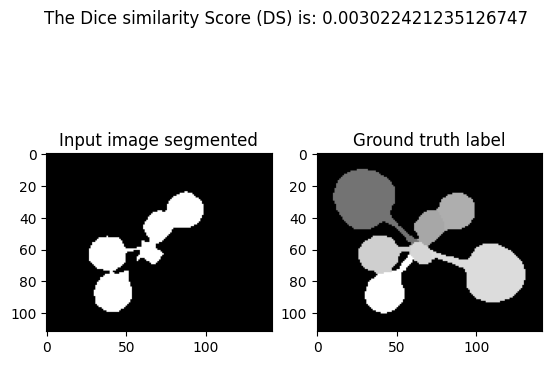

Processing image 2...
Image file: /content/drive/MyDrive/plant images/plant002_rgb.png
Label file: /content/drive/MyDrive/plant images/plant002_label.png


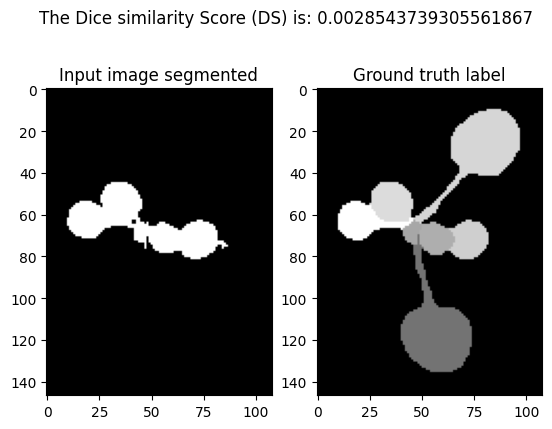

Processing image 3...
Image file: /content/drive/MyDrive/plant images/plant003_rgb.png
Label file: /content/drive/MyDrive/plant images/plant003_label.png


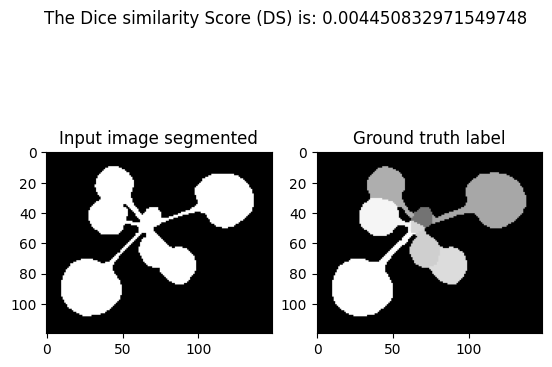

Processing image 4...
Image file: /content/drive/MyDrive/plant images/plant004_rgb.png
Label file: /content/drive/MyDrive/plant images/plant004_label.png


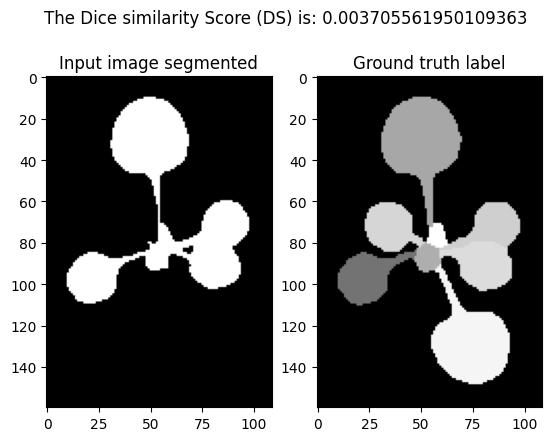

Processing image 5...
Image file: /content/drive/MyDrive/plant images/plant005_rgb.png
Label file: /content/drive/MyDrive/plant images/plant005_label.png


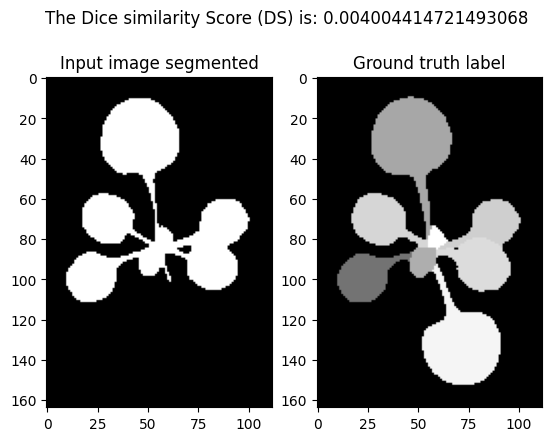

Processing image 6...
Image file: /content/drive/MyDrive/plant images/plant006_rgb.png
Label file: /content/drive/MyDrive/plant images/plant006_label.png


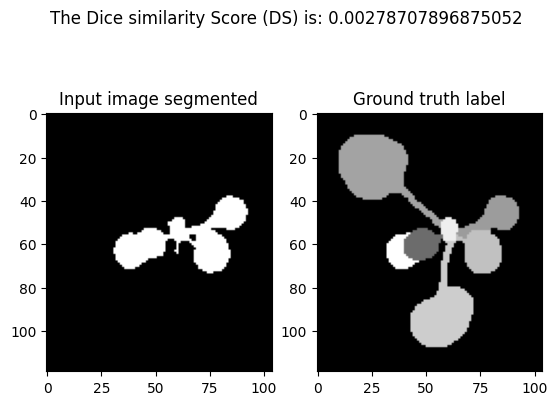

Processing image 7...
Image file: /content/drive/MyDrive/plant images/plant007_rgb.png
Label file: /content/drive/MyDrive/plant images/plant007_label.png


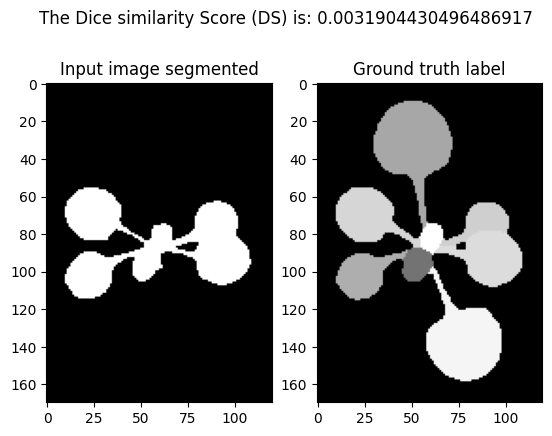

Processing image 8...
Image file: /content/drive/MyDrive/plant images/plant008_rgb.png
Label file: /content/drive/MyDrive/plant images/plant008_label.png


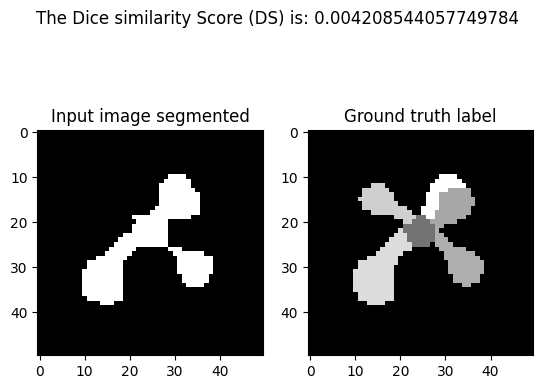

Processing image 9...
Image file: /content/drive/MyDrive/plant images/plant009_rgb.png
Label file: /content/drive/MyDrive/plant images/plant009_label.png


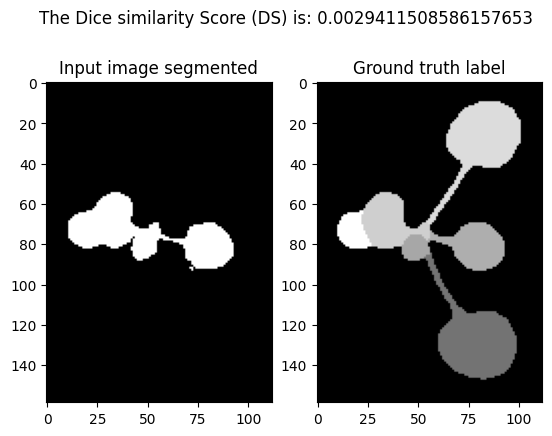

Processing image 10...
Image file: /content/drive/MyDrive/plant images/plant010_rgb.png
Label file: /content/drive/MyDrive/plant images/plant010_label.png


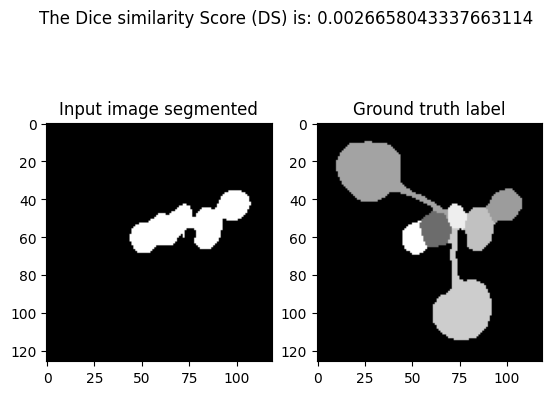

Processing image 11...
Image file: /content/drive/MyDrive/plant images/plant011_rgb.png
Label file: /content/drive/MyDrive/plant images/plant011_label.png


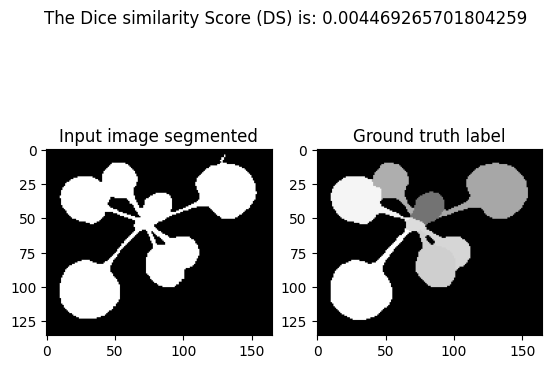

Processing image 12...
Image file: /content/drive/MyDrive/plant images/plant012_rgb.png
Label file: /content/drive/MyDrive/plant images/plant012_label.png


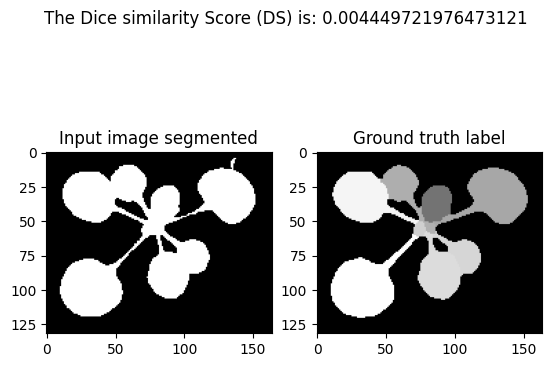

Processing image 13...
Image file: /content/drive/MyDrive/plant images/plant013_rgb.png
Label file: /content/drive/MyDrive/plant images/plant013_label.png


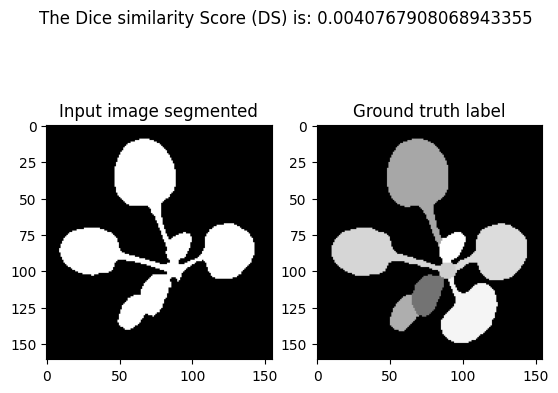

Processing image 14...
Image file: /content/drive/MyDrive/plant images/plant014_rgb.png
Label file: /content/drive/MyDrive/plant images/plant014_label.png


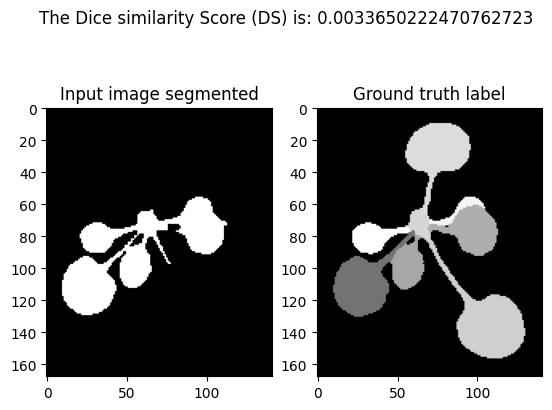

Processing image 15...
Image file: /content/drive/MyDrive/plant images/plant015_rgb.png
Label file: /content/drive/MyDrive/plant images/plant015_label.png


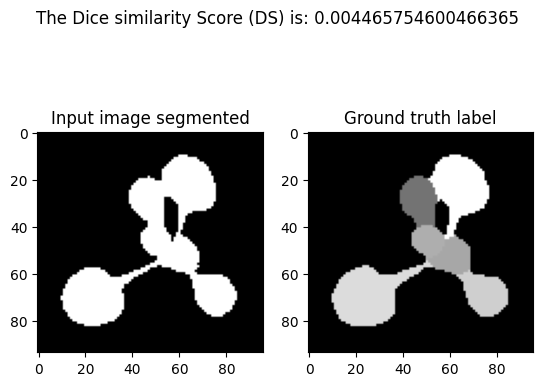

Processing image 16...
Image file: /content/drive/MyDrive/plant images/plant016_rgb.png
Label file: /content/drive/MyDrive/plant images/plant016_label.png


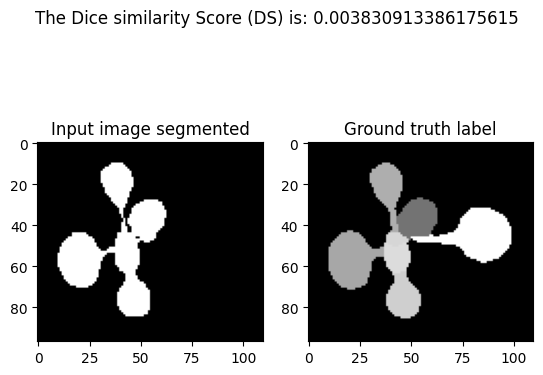

In [17]:
folder_name = "/content/drive/MyDrive/plant images"  # specify the path to the folder containing the images and labels

for i in range(1, 17):
    # read the input image and label
    image_file = folder_name + "/plant" + str(i).zfill(3) + "_rgb.png"
    label_file = folder_name + "/plant" + str(i).zfill(3) + "_label.png"

    print(f"Processing image {i}...")
    print("Image file:", image_file)
    print("Label file:", label_file)

    input_image = cv2.imread(image_file)
    input_label = cv2.imread(label_file, 0)

    if input_image is None or input_label is None:
        print(f"Failed to load image or label file: {image_file}, {label_file}")
        continue

    # convert the image to HSV
    hsv_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2HSV)
    grayscale_image = hsv_image[..., 2]

    # threshold the grayscale image
    _, thresholded_image = cv2.threshold(grayscale_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # perform connected component analysis
    num_labels, labeled_image = cv2.connectedComponents(thresholded_image)

    # find the label with the maximum area (excluding the background)
    max_area = 0
    max_label = 0
    for label in range(1, num_labels):
        area = np.sum(labeled_image == label)
        if area > max_area:
            max_area = area
            max_label = label

    # create the segmented image
    segmented_image = np.zeros_like(labeled_image, dtype=np.uint8)
    segmented_image[labeled_image == max_label] = 255

    # compute the Dice similarity score
    intersection = np.logical_and(segmented_image, input_label)
    dice_score = 2.0 * np.sum(intersection) / (np.sum(segmented_image) + np.sum(input_label))

    # display the segmented image and Dice similarity score
    plt.subplot(1, 2, 1)
    plt.imshow(segmented_image, cmap='gray')
    plt.title("Input image segmented")
    plt.subplot(1, 2, 2)
    plt.imshow(input_label, cmap='gray')
    plt.title("Ground truth label")
    plt.suptitle(f"The Dice similarity Score (DS) is: {dice_score}")
    plt.show()